In [41]:
import pandas as pd
df = pd.read_csv('../input/titanic/train.csv')
df.head(1).T

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [4]:
from sklearn.model_selection import ShuffleSplit
shu = ShuffleSplit(n_splits=2, test_size=.3, random_state=0)
for train_id, test_id in shu.split(df):
    train = df.iloc[train_id]
    test = df.iloc[test_id]

In [70]:
target = 'Survived'
num = [x for x in df.columns if df.dtypes[x] != 'object']
cat = [x for x in df.columns if df.dtypes[x] == 'object']
num.remove(target)
num.remove('PassengerId')
print('num ->', num)
print('cat ->', cat)

num -> ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat -> ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [71]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [72]:
import numpy as np

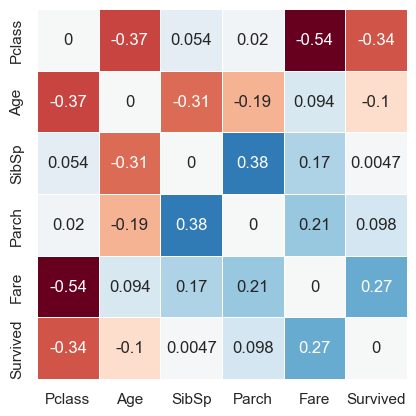

In [83]:
cr = train[num+[target]].corr()
np.fill_diagonal(cr.values, 0)
sns.heatmap(cr, cbar=False, cmap='RdBu', center=0, annot=True, square=True, linewidth=.5);

# Model

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(), GaussianNB());
model.fit(train[num], train[target]);
pred = model.predict(test[num])

# Validate

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, test[num], test[target], cv=10).mean()

0.6646723646723647

# Submission

In [32]:
exam = pd.read_csv('../input/titanic/test.csv')

In [38]:
submission = pd.DataFrame({
    'PassengerId': exam['PassengerId'],
    'Survived': model.predict(exam[num])
})

In [39]:
submission.to_csv('submission.csv', index=False)